# PRACTICE: IRIS DATASET<a href="#PRACTICE:-IRIS-DATASET" class="anchor-link">¶</a>

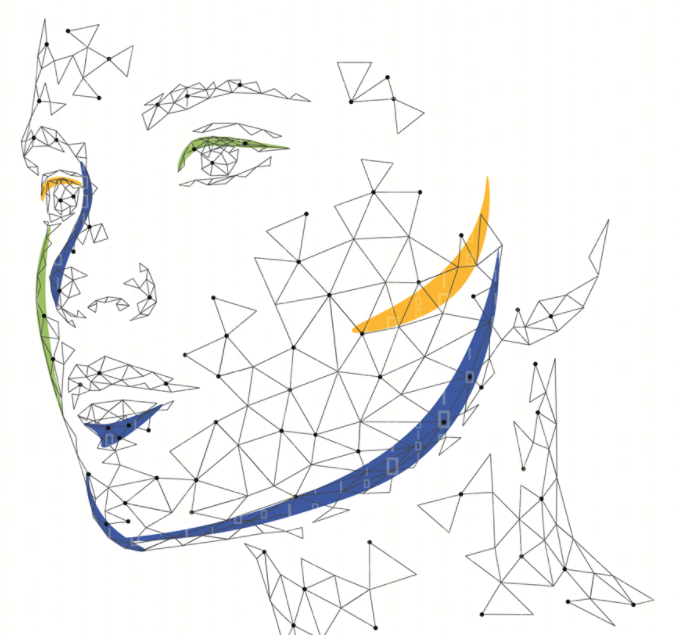

## PROBLEM:<a href="#PROBLEM:" class="anchor-link">¶</a>

You are provided with Iris plants dataset. The Iris plants dataset is a
classic and very easy `multi-class classification` dataset.  

### Data Characteristics<a href="#Data-Characteristics" class="anchor-link">¶</a>

1.  `Number of Instances`: 150 (50 in each of three classes).
2.  `Number of Attributes`: 4 numeric, predictive attributes and the
    class.
3.  `Features`: sepal length in cm, sepal width in cm, petal length in
    cm, petal width in cm.
4.  `Class`: Iris-Setosa, Iris-Versicolour, Iris-Virginica
5.  `Class Distribution`: 33.3% for each of 3 classes.
6.  `Creator`: R.A. Fisher.
7.  `Donor`: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov).
8.  `Date`: July, 1988.

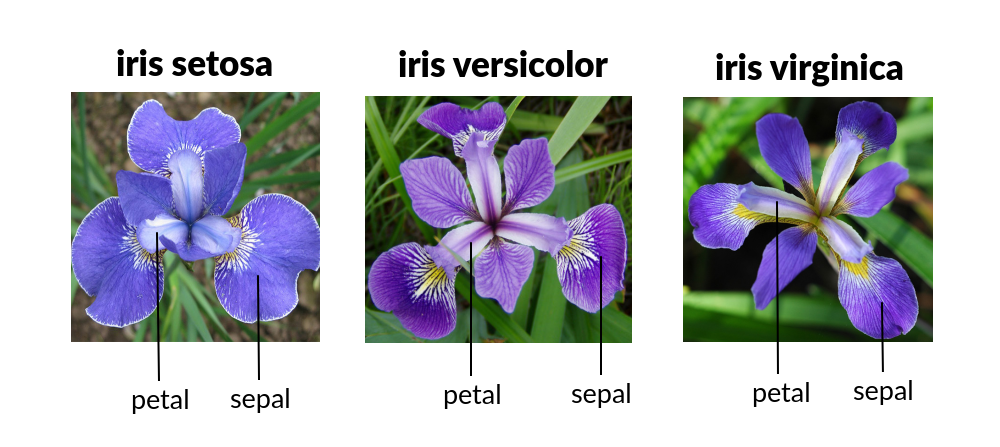

### Question<a href="#Question" class="anchor-link">¶</a>

1.  Analyze and visualize the datasets
2.  Build a simple machine learning model to classify a iris species

## SOLUTION:<a href="#SOLUTION:" class="anchor-link">¶</a>

### Overall solution<a href="#Overall-solution" class="anchor-link">¶</a>

A simple machine learning solution can be splitted into 3 steps:

-   Step 1: Prepare data and do the EDA
-   Step 2: Build and train a machine learning model
-   Step 3: Run the machine learning model with new data

### Step 0: Install and import library<a href="#Step-0:-Install-and-import-library" class="anchor-link">¶</a>

Install sklearn by running this command in jupyter notebook:
`!conda install -c anaconda scikit-learn -y`


In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# `sklearn` library used to train and eval model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# `joblib` used to save and load trained model
from joblib import dump, load

### Step 1: Prepare, analyze, and visualize dataset<a href="#Step-1:-Prepare,-analyze,-and-visualize-dataset" class="anchor-link">¶</a>

#### Step 1.1: Prepare Iris dataset<a href="#Step-1.1:-Prepare-Iris-dataset" class="anchor-link">¶</a>

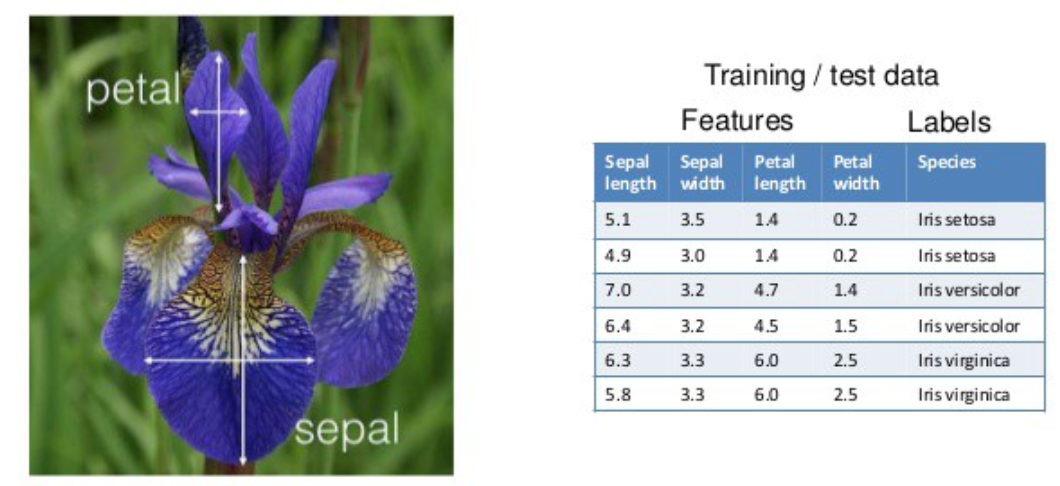

In [3]:
iris_df = sns.load_dataset('iris')
print(iris_df.shape)
iris_df.head()

(150, 5)


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

#### Step 1.2: EDA (Exploratory Data Analysis)<a href="#Step-1.2:-EDA-(Exploratory-Data-Analysis)" class="anchor-link">¶</a>

In [3]:
# Check null value in the data, the datatype, the size of data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Another way to check null value in the data
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
# Number of labels in the dataset and number of samples each label
species_count = iris_df.species.value_counts()
species_count

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

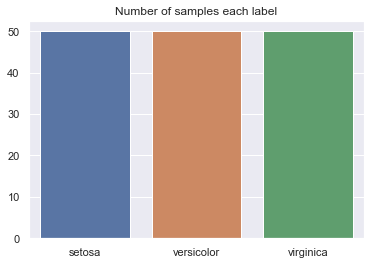

In [6]:
# Plot the barplot
sns.barplot(x=species_count.index, y=species_count.values)
plt.title('Number of samples each label')
plt.show()

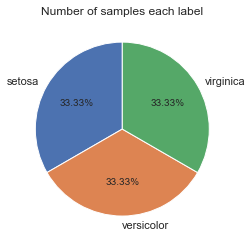

In [7]:
# Plot the pieplot
plt.pie(species_count.values, labels=species_count.index, startangle=90, autopct='%.2f%%')
plt.title('Number of samples each label')
plt.show()

In [8]:
iris_df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

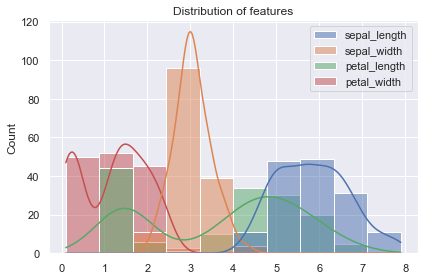

In [9]:
# Plot the distribution of each feature
sns.histplot(data=iris_df, bins=10, kde=True)
plt.title('Distribution of features')
plt.tight_layout()
plt.show()

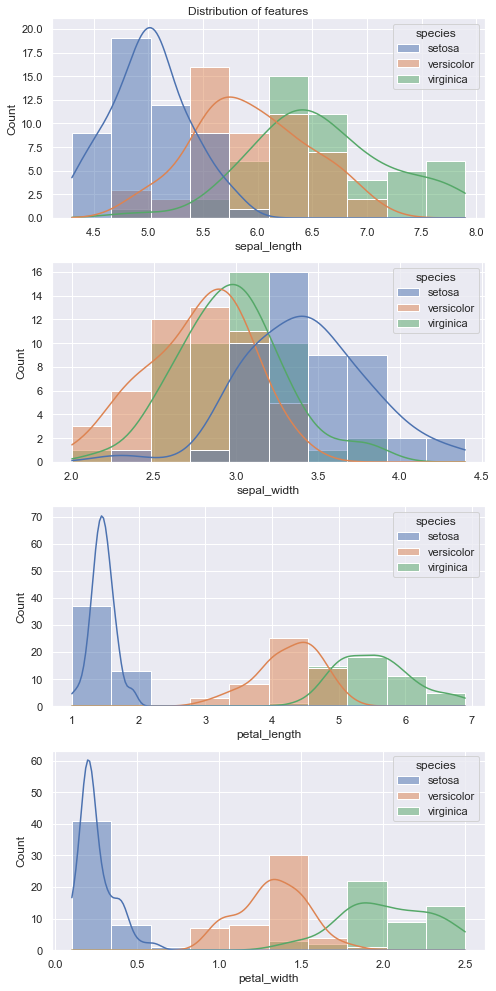

In [10]:
# Plot the distribution of each feature
feature_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, ax = plt.subplots(4, 1, figsize=(7, 14))

for index, feature in enumerate(feature_list):
    sns.histplot(ax=ax[index], x=feature, data=iris_df, bins=10, kde=True, hue='species')

plt.suptitle('Distribution of features')
plt.tight_layout()
plt.show()

In [11]:
# Statistics of each features
iris_df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

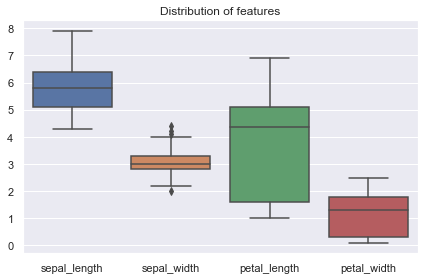

In [12]:
# Plot statistics of each features
sns.boxplot(data=iris_df) 
plt.title('Distribution of features')
plt.tight_layout()
plt.show()

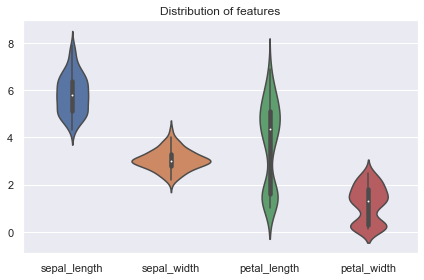

In [13]:
# Plot statistics of each features
sns.violinplot(data=iris_df) 
plt.title('Distribution of features')
plt.tight_layout()
plt.show()

### Step 2: Build and train a machine learning model<a href="#Step-2:-Build-and-train-a-machine-learning-model" class="anchor-link">¶</a>

#### Step 2.1: Split data into train and test<a href="#Step-2.1:-Split-data-into-train-and-test" class="anchor-link">¶</a>

In [14]:
x_data = iris_df.drop('species', axis=1)
x_data

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [15]:
y_data = iris_df.species
y_data

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [17]:
# Split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

In [18]:
x_train.shape, y_train.shape

((120, 4), (120,))

In [19]:
x_test.shape, y_test.shape

((30, 4), (30,))

#### Step 2.2: Train model<a href="#Step-2.2:-Train-model" class="anchor-link">¶</a>

Detail of parameters used in LogisticRegression can be found
[here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [20]:
# Create a logicstic regression model
model = LogisticRegression(max_iter=1000)

In [21]:
# Fit model with train set
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Show model classes
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [23]:
# Predict the test set
y_pred = model.predict(x_test)
y_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [24]:
# Predict the probability of the test set
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[9.84692334e-01, 1.53076441e-02, 2.17460049e-08],
       [2.76321817e-01, 7.21032301e-01, 2.64588216e-03],
       [6.25243831e-03, 8.89268767e-01, 1.04478795e-01],
       [9.85494503e-01, 1.45054333e-02, 6.32066343e-08],
       [1.17086026e-06, 1.90524813e-02, 9.80946348e-01],
       [4.50981093e-03, 6.28117847e-01, 3.67372343e-01],
       [1.46174037e-04, 1.27617719e-01, 8.72236107e-01],
       [9.57812468e-01, 4.21863088e-02, 1.22333351e-06],
       [9.69635153e-01, 3.03645392e-02, 3.07605860e-07],
       [9.69747567e-06, 2.70564845e-02, 9.72933818e-01],
       [1.89725172e-02, 8.79817893e-01, 1.01209589e-01],
       [9.66450731e-01, 3.35488279e-02, 4.41320736e-07],
       [4.69004320e-06, 3.10133023e-02, 9.68982008e-01],
       [7.11811313e-03, 8.01975470e-01, 1.90906417e-01],
       [6.96322311e-03, 7.49289954e-01, 2.43746823e-01],
       [9.88146696e-01, 1.18532376e-02, 6.67231126e-08],
       [2.24810052e-02, 9.37035263e-01, 4.04837316e-02],
       [1.09498718e-02, 6.82107

#### Step 2.3: Evaluate the model<a href="#Step-2.3:-Evaluate-the-model" class="anchor-link">¶</a>

We can evalute the classification model by using some metrics:
`accuracy`, `precision`, `recall` and `F1-score`. All these metrics can
be calculated by `confusion matrix`.  

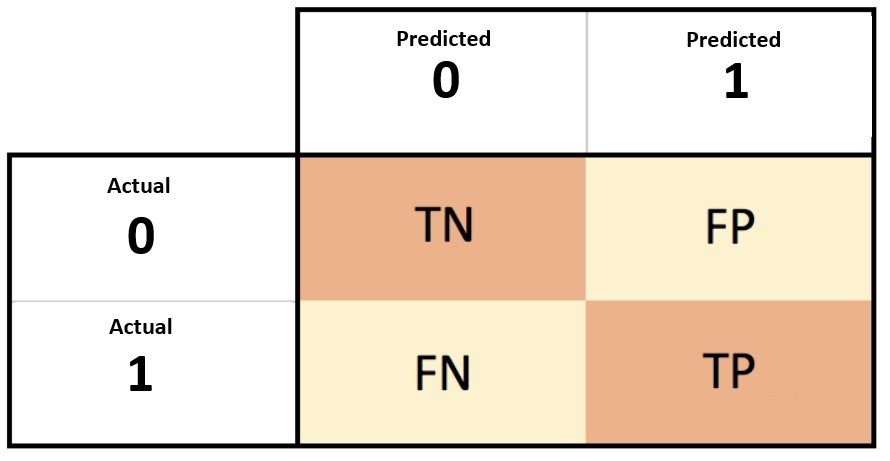

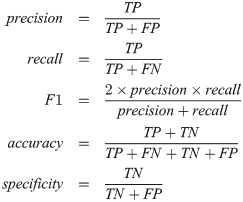

More about model evaluation can be found
[here](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [25]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

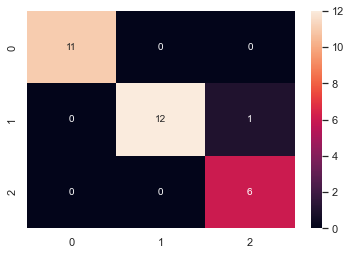

In [28]:
sns.heatmap(cm, annot=True)
plt.show()

### Step 3: Run the machine learning model with new data<a href="#Step-3:-Run-the-machine-learning-model-with-new-data" class="anchor-link">¶</a>

In [29]:
# Save model to file
dump(model, 'model.joblib') # pickle

['model.joblib']

In [30]:
# Load model from file
loaded_model = load('model.joblib')

In [31]:
# Check loaded model
y_pred = loaded_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [32]:
def classify_iris(sepal_length, sepal_width, petal_length, petal_width, model):
    input_data = np.array(
        [sepal_length, sepal_width, petal_length, petal_width], dtype=np.float64)
    input_data = np.expand_dims(input_data, axis=0)
    prediction = model.predict(input_data)
    return prediction

In [33]:
classify_iris('1', 2, 3, 4, loaded_model)

c:\Users\HungDo\anaconda3\envs\pyclass\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)